# Multilayer model MNIST classification

Note: This notebook is designed to run with CPU (no GPU) runtime.

Import modules and set random seeds.

In [1]:
import os, random
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230515)
np.random.seed(20190825)
tf.random.set_seed(20190825)

plt.rcParams.update({'font.size': 10})

Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Define the multilayer feedforward network model.

In [3]:
model = models.Sequential(name='multilayer_model')
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(256, activation='relu', name='feedforward1'))
model.add(layers.Dense(512, activation='relu', name='feedforward2'))
model.add(layers.Dense(256, activation='relu', name='feedforward3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "multilayer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ feedforward1 (Dense)                 │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feedforward2 (Dense)                 │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feedforward3 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 466,442 (1.78 MB)

 Trainable params: 466,442 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model using the Adam optimizer, and categorical crossentroy as a loss function.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Train the model. It acheves around 98% accuracy for the test dataset.

In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - acc: 0.8729 - loss: 0.4316 - val_acc: 0.9659 - val_loss: 0.1051
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - acc: 0.9707 - loss: 0.0984 - val_acc: 0.9758 - val_loss: 0.0767
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9806 - loss: 0.0636 - val_acc: 0.9770 - val_loss: 0.0829
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9855 - loss: 0.0458 - val_acc: 0.9756 - val_loss: 0.0854
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9886 - loss: 0.0364 - val_acc: 0.9772 - val_loss: 0.0838
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - acc: 0.9892 - loss: 0.0319 - val_acc: 0.9740 - val_loss: 0.1085
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9907 - loss: 0.0287 - val_acc: 0.9764 - val_loss: 0.0882
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9929 - loss: 0.0201 - val_acc: 0.9769 - val_loss: 0.0936
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16

Plot charts for the accuracy and loss values.

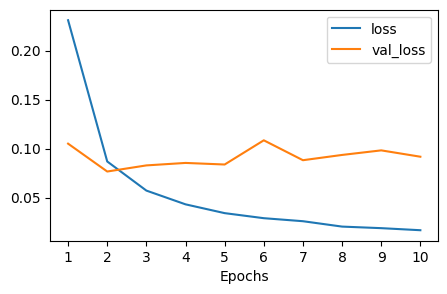

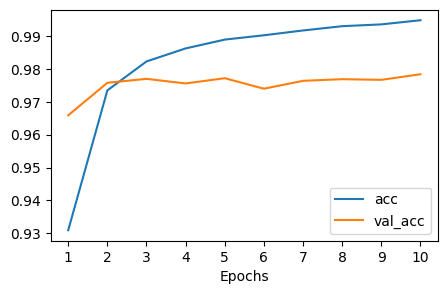

In [7]:
df = DataFrame({'loss': history.history['loss'],
                'val_loss': history.history['val_loss']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)

df = DataFrame({'acc': history.history['acc'],
                'val_acc': history.history['val_acc']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)